In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBRFClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [26]:
data=pd.read_csv('../Phase_2_data/loan_prediction.csv')

In [27]:
data.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [28]:
features = [
    "Loan_ID",
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Applicant Income",
    "CoapplicantIncome",
    "Loan_Amount",
    "Loan_Amount_Term",
    "Credit History",
    "Property_Area",
    "Loan_Status"
]

# Create a DataFrame with the features as columns

data.columns= features


# Display the DataFrame
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [29]:
data=data.drop(columns=['Loan_ID'],axis=1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    object 
 1   Married            610 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      581 non-null    object 
 5   Applicant Income   613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        592 non-null    float64
 8   Loan_Amount_Term   599 non-null    float64
 9   Credit History     563 non-null    float64
 10  Property_Area      613 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [31]:
data.describe()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [32]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

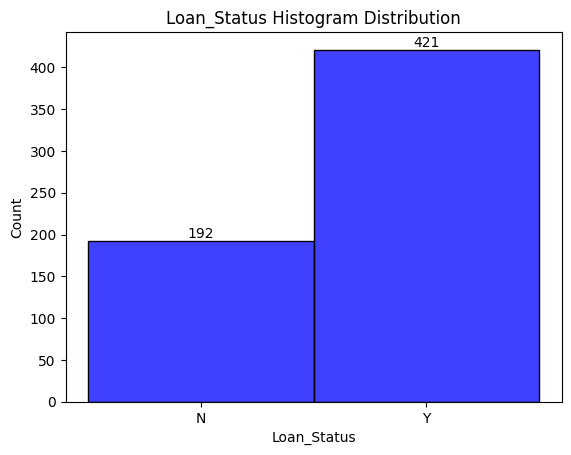

In [33]:
ax = sns.histplot(x=data['Loan_Status'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Loan_Status')
plt.title('Loan_Status Histogram Distribution')
plt.show()

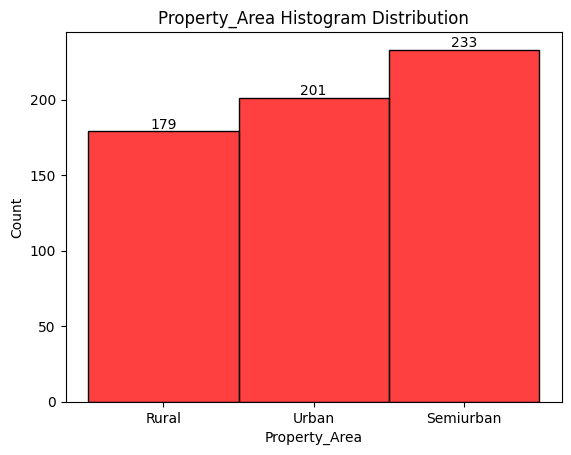

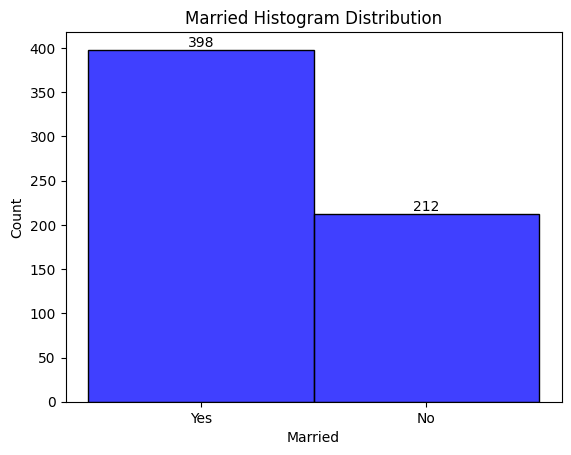

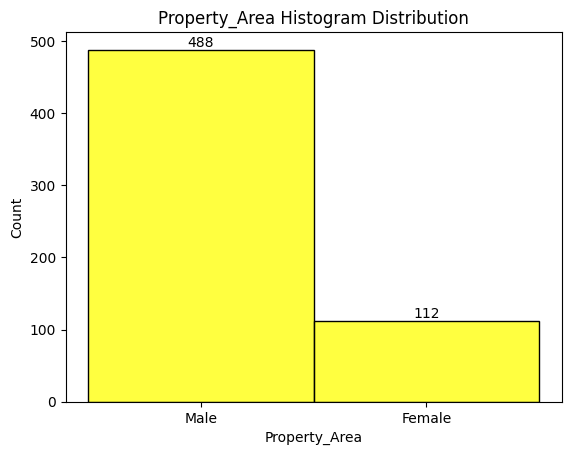

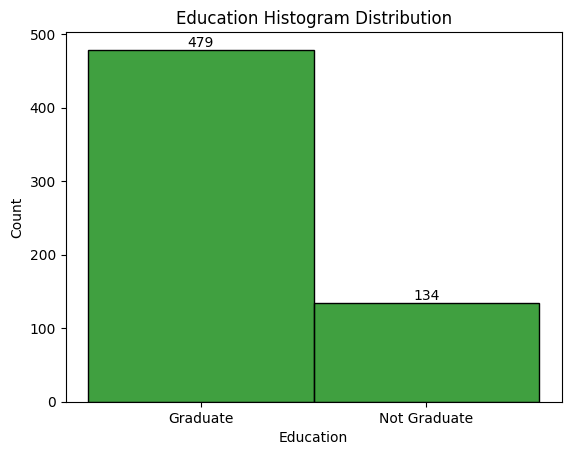

In [34]:
ax = sns.histplot(x=data['Property_Area'], color='red')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Property_Area')
plt.title('Property_Area Histogram Distribution')
plt.show()


ax = sns.histplot(x=data['Married'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Married')
plt.title('Married Histogram Distribution')
plt.show()

ax = sns.histplot(x=data['Gender'], color='yellow')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Property_Area')
plt.title('Property_Area Histogram Distribution')
plt.show()

ax = sns.histplot(x=data['Education'], color='green')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Education')
plt.title('Education Histogram Distribution')
plt.show()


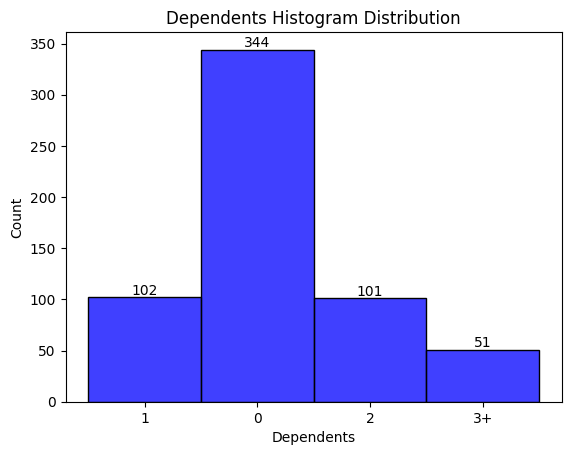

In [35]:
ax = sns.histplot(x=data['Dependents'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Dependents')
plt.title('Dependents Histogram Distribution')
plt.show()


In [36]:
from sklearn.preprocessing import LabelEncoder


object_cols = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each object column
for col in object_cols:
    label_encoder = LabelEncoder()

    data[col] = label_encoder.fit_transform(data[col])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             613 non-null    int32  
 1   Married            613 non-null    int32  
 2   Dependents         613 non-null    int32  
 3   Education          613 non-null    int32  
 4   Self_Employed      613 non-null    int32  
 5   Applicant Income   613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        592 non-null    float64
 8   Loan_Amount_Term   599 non-null    float64
 9   Credit History     563 non-null    float64
 10  Property_Area      613 non-null    int32  
 11  Loan_Status        613 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.8 KB


In [39]:
data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
columns_to_fill = ['Loan_Amount', 'Loan_Amount', 'Credit History']

# Fill NaNs with the mean of each column
for column in columns_to_fill:
    data[column].fillna(data[column].mean(), inplace=True)

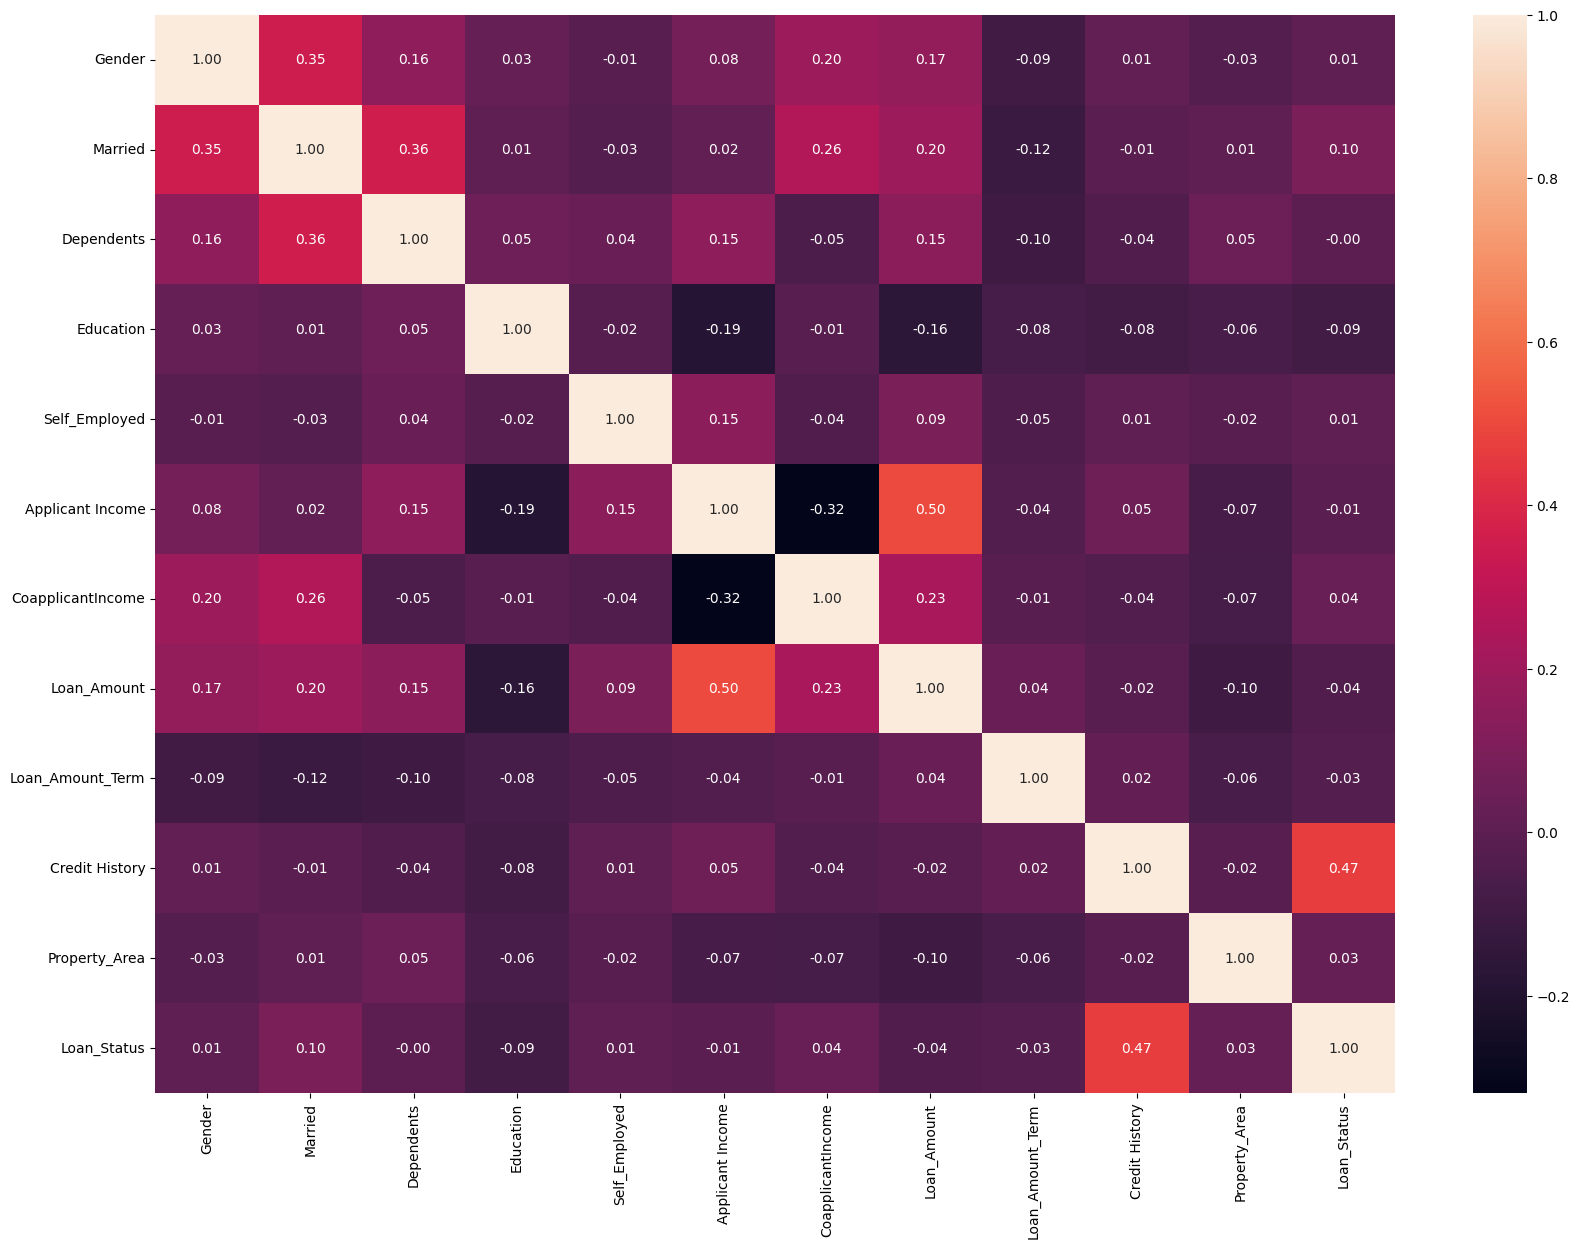

In [44]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(data=data.corr(method='spearman'), annot=True, fmt='.2f')


In [47]:
data.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
data['Total_Income'] = data['Applicant Income'] + data['CoapplicantIncome']
data = data.drop([ 'Applicant Income', 'CoapplicantIncome'], axis=1)


In [49]:
data.duplicated().sum()

0

In [50]:
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Taining a Model

In [51]:
def evaluation_fn(best_model,X_test_scaled,Y_test):
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')
    print('=================================================================================')

    print('Accuracy of the model is:', accuracy)
    print('Precision of the model is:', precision)
    print('Recall of the model is:', recall)
    print('F1 score of the model is:', f1)    

    # ROC curve and AUC
    print('=================================================================================')
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    print('=================================================================================')


Accuracy of the model is: 0.6341463414634146
Precision of the model is: 0.6261154074955384
Recall of the model is: 0.6341463414634146
F1 score of the model is: 0.6266762348587683


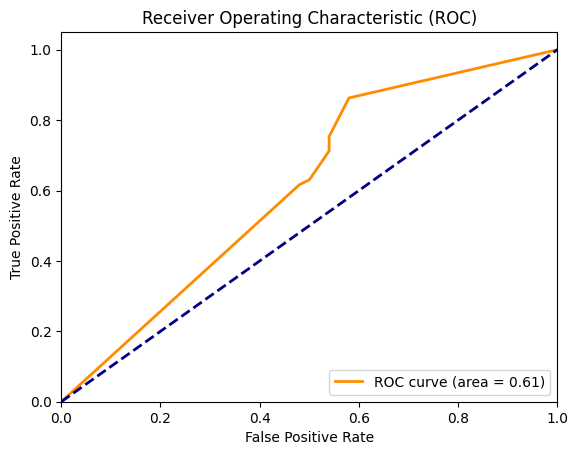

In [52]:
model = DecisionTreeClassifier(random_state=17)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.7479674796747967
Precision of the model is: 0.7925379992930365
Recall of the model is: 0.7479674796747967
F1 score of the model is: 0.7210260035136578


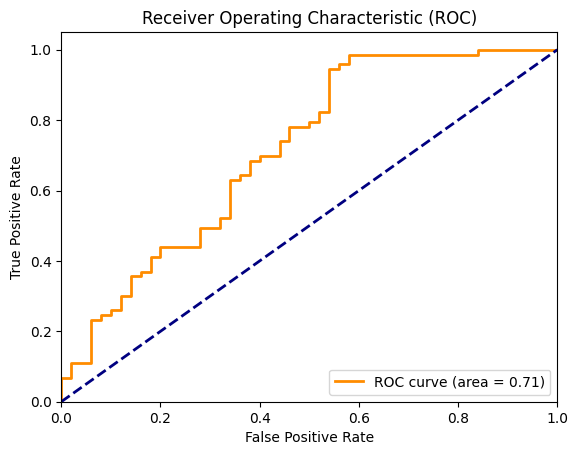

In [53]:
model = RandomForestClassifier(random_state=17)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the model is: 0.7317073170731707
Precision of the model is: 0.7516184884071063
Recall of the model is: 0.7317073170731707
F1 score of the model is: 0.7098942333463909


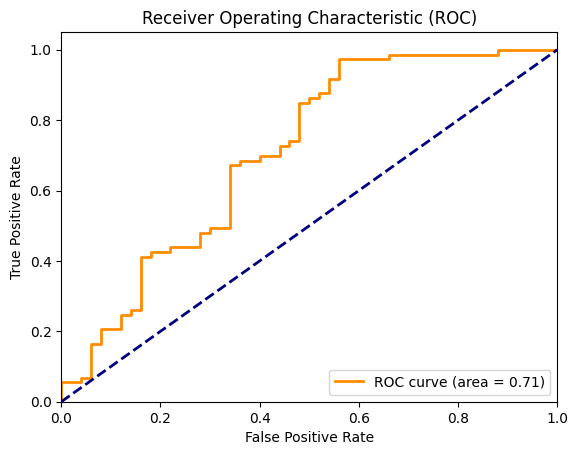

In [54]:
model = XGBRFClassifier(random_state=17)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Random Forest Classifier:
Accuracy of the model is: 0.7560975609756098
Precision of the model is: 0.8111128185989331
Recall of the model is: 0.7560975609756098
F1 score of the model is: 0.7282964208952434


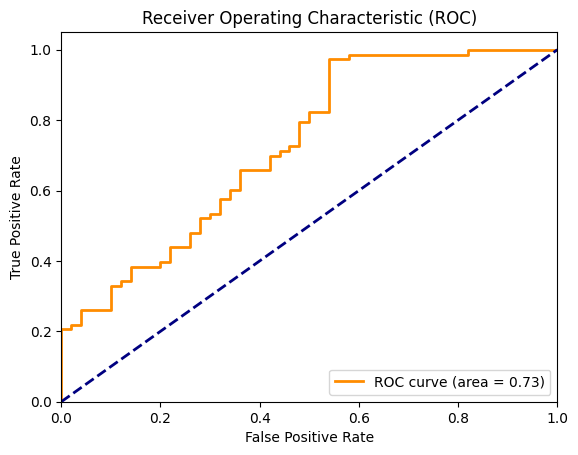

In [55]:
# Random Forest Classifier with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=17)
param_grid_rf = {
    'n_estimators': [60,80,100,150,200,250],
    'max_depth': [6,7,8,10,12],
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='f1')
grid_search_rf.fit(X_train, Y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Random Forest Classifier:")
evaluation_fn(best_rf_model, X_test, Y_test)